# Logistic Classification

__Group: Iñigo Martiarena y Carlos Rodríguez-Viña__

__Lending Club Loan Status Analysis__

# Library

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns


from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

### Load Daset

We load the sample we have created in our notebook called "Sample"

In [31]:
X_ada = pd.read_csv('../data/X_ada.csv', engine = 'python')
y_ada = pd.read_csv('../data/y_ada.csv', engine = 'python')
X_test = pd.read_csv('../data/X_test.csv', engine = 'python')
y_test = pd.read_csv('../data/y_test.csv', engine = 'python')

### Standarization Model

Due to having 58 variables in our dataset, we need to proceed to standarize our data, to ensure uniformity to certain practices within the industry.

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ada = scaler.fit_transform(X_ada)
X_test= scaler.fit_transform(X_test)

# Model

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

 - __1 / (1 + e^-value)__

Where e is the base of the natural logarithms (Euler’s number or the EXP() function in your spreadsheet) and value is the actual numerical value that you want to transform. Below is a plot of the numbers between -5 and 5 transformed into the range 0 and 1 using the logistic function.

In [32]:
classifier = LogisticRegression(random_state = 123)

In [33]:
classifier.fit(X_ada, y_ada)

LogisticRegression(random_state=123)

We proceed with the prediction base on the model we just built, and to calculate the following indicators:

 - Confusion Matrix
 - Accuracy score.
 - Recall Score.
 - Precision.
 - Roc Auc score.
 - F1 score

In [34]:
y_class = classifier.predict(X_test) 

### Confussion Matrix

In [35]:
ConfusionMatrix = confusion_matrix(y_test, y_class)
ConfusionMatrix

array([[20120,   316],
       [12639, 49793]], dtype=int64)

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt


ConfusionMatrixDisplay(ConfusionMatrix)

According to our confussion Matrix we can interpretate the following:

 - 20.210 True Negatives. We have predicted "Charged Off" and in real they are "Charged Off".
 - 316 False Positives. We have predicted "Fully Paid" in reality "Charged Off".
 - 12.639 Flase Negatives. We have predicted "Charge Off" in reality "Full Paid".
 - 49.793 True Postives. We have predicted "Fully Paid" and in real they are "Fully Paid".
 
Of a total sample of 81.890 observations our model has predicted wrong 12.955, which is a 15% of the total

### Accuracy Score

In [37]:
accuracy_score(y_test, y_class)

0.8436670367331177

With this model we were able to obtain a 75,58% of accuracy, which means if we have 100 observation we are able to predict altmost 76% right. The issue with this score is when our model is imbalanced, meaning this score can deceive us into believing that a bad model is a good model. So to be certain we are going to use the balanced_accuracy.

In [38]:
balanced_accuracy_score(y_test, y_class, sample_weight=None, adjusted=False)

0.8910464160265715

### Recall Score & Precision Score

In [39]:
recall_score(y_test, y_class)

0.7975557406458227

The ratio is number of true positives/(true positives + false negatives), it informs us about the quantity that our model can predict being 1 the best value and 0 the worst values, in our case we have obtain an outstanding result

We measure the quality of our model, the formula is TruePositive/(TruePositives+FalsePositives)

In [40]:
precision_score(y_test, y_class)

0.9936937476301663

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative being best value 1 and worst value 0.

From the results we can obtain that our model prioritize precision over recall, in our case is better to focus on precision becaus we want to reduce the number of False Positves in the loans, however our precision score is veru high, the reasons for this are the following:

 - Imbalanced Sample.
 - We have missed important variables in our selection.
 - Our model is so train that is bias towards certain results.
 - We have created a great model

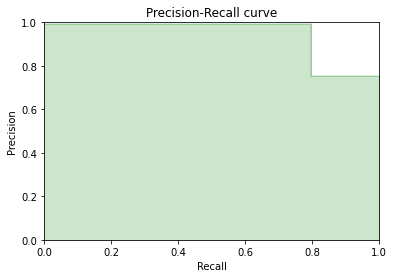

In [41]:
#Precision-Recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _= precision_recall_curve(y_test, y_class)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

We can see from the graph the trade-off of the scores.

### F1 Score

What if you want to balance the two objectives: high precision and high recall? Or, as a pirate captain, you want to optimize towards capturing treasure and avoiding mutiny? We calculate the F1-score as the harmonic mean of precision and recall to accomplish just that.

In [42]:
from sklearn.metrics import f1_score

def f1score (a, b):
    return (precision_score(y_test, y_class)*recall_score(y_test, y_class))/(precision_score(y_test, y_class)+recall_score(y_test, y_class))


In [43]:
f1score(y_test, y_class)

0.4424431984787766

Our f1 score show us that the mean between the precision score and the recall score, being a 45% we consider is a good result and our model focueses both in recall and precision, so if we wanted to increase one over the other there would not be any inconvineance.

### ROC AUC Score

The ROC  is created by  the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. 


In [44]:
roc_auc_score(y_test, y_class)

0.8910464160265715

The roc curve shows us in a simple way the probability that our model clasifies a random observation into a TP rahter that FP in diferent thresholds. Our AUC is 80%, which means that are predictions are 80% correct. However, in this particular case we want to identify as much False positives as possible, as they are people who are not going to receive the loan, when in reality they should recieve it.

### Cumulative Gain Curve

The cumulative gains chart shows the percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases. 

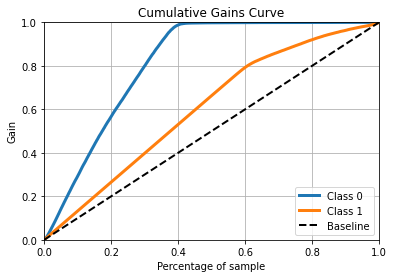

In [46]:
predicted_probabilities = classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)
plt.show()

According to our curve if we analize a 60% of our the observations we are going to able to gain between 80%.

### Conclusion

In [13]:
print("The results of our Logistic")


print("accuracy score", accuracy_score(y_test, y_class))
print("balanced accuracy score", balanced_accuracy_score(y_test, y_class))
print("recall score", recall_score(y_test, y_class))
print("precision score", precision_score(y_test, y_class))
print("roc auc score", roc_auc_score(y_test, y_class))

The results of our Logistic
accuracy score 0.70536274557127
balanced accuracy score 0.8041300933850165
recall score 0.6092388518708355
precision score 0.9994744586924532
roc auc score 0.8041300933850166


After reviewing several of the results we have concluded the following:

    1) Our dataset is imbalance so the results we have obtain are normal because they are biased.
    2) Our model is so train that the bias affects our results.
    3) During the selection of the variables we have add or remove important variable that affect the results.
    4) We have built a very robust and precise model.

Due to not being the best model, we will not proceed with the hyperparameters.

In [20]:
pickle.dump(classifier, open("classifier", "wb"))

### References

To built our model we have search many sources of informaction through the internet.

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451 # parameters

https://scikit-learn.org/stable/modules/naive_bayes.html # naive model

https://towardsdatascience.com/tagged/scikit-learn # sk

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf # pipelines

https://medium.com/@benfenison/gridsearching-a-random-forest-classifier-fc225609699c # rf

https://medium.com/fintechexplained/how-to-save-trained-machine-learning-models-649c3ad1c018 # pickle

https://machinelearningmastery.com/rfe-feature-selection-in-python/ # feature engineering

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c # precision and recall

https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14 # cumulative gain

https://towardsdatascience.com/evaluate-model-performance-with-cumulative-gains-and-lift-curves-1f3f8f79da01 # cumulative gain

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=true%20positives%20(TP)%3A%20These,they%20do%20have%20the%20disease.&text=false%20positives%20(FP)%3A%20We,actually%20do%20have%20the%20disease. # confusion matrix


https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c# roc curve

